In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)
    
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

# import autotime
# %load_ext autoreload
# %autoreload 2
# %load_ext autotime

In [2]:
_real = [0,1,0,0,1,0,0,1,0,1]
_prob = [0.1,0.9,0.25,0.05,0.45,0.55,0.20,0.7,0.02,0.99]

In [3]:
gs = pd.cut(x = _prob,
       bins = np.arange(0,1.2,0.2), 
       labels = ['G' + str(x).zfill(2) for x in range(1,6,1)])

In [4]:
gs

['G01', 'G05', 'G02', 'G01', 'G03', 'G03', 'G01', 'G04', 'G01', 'G05']
Categories (5, object): ['G01' < 'G02' < 'G03' < 'G04' < 'G05']

In [5]:
dfcal = pd.DataFrame({'real':_real, 'prob':_prob, 'grupo':gs})

In [6]:
dfcal

,real,prob,grupo
0,0,0.10,G01
1,1,0.90,G05
2,0,0.25,G02
3,0,0.05,G01
4,1,0.45,G03
5,0,0.55,G03
6,0,0.20,G01
7,1,0.70,G04
8,0,0.02,G01
9,1,0.99,G05


In [7]:
dfcal['real'] = dfcal['real'].astype(float) 

In [9]:
dfplot = dfcal.groupby('grupo').agg({'prob':np.mean}).reset_index().rename(columns = {'prob':'mean_prob'})

In [10]:
dfplot

,grupo,mean_prob
0,G01,0.0925
1,G02,0.2500
2,G03,0.5000
3,G04,0.7000
4,G05,0.9450


In [11]:
dfplot['fraction_positives'] = dfcal.groupby('grupo').agg({'real':np.mean}).reset_index()['real']

In [12]:
dfplot

,grupo,mean_prob,fraction_positives
0,G01,0.0925,0.0
1,G02,0.2500,0.0
2,G03,0.5000,0.5
3,G04,0.7000,1.0
4,G05,0.9450,1.0


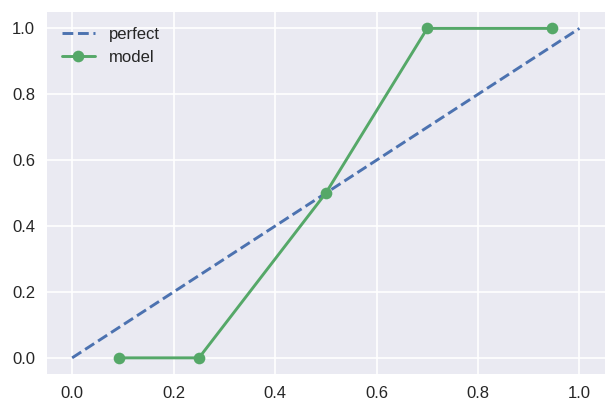

In [13]:
plt.plot([0,1],[0,1],'--', label = 'perfect')
plt.plot(dfplot['mean_prob'],dfplot['fraction_positives'], label =  'model', marker = 'o')
plt.legend()
plt.show()
